In [49]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
#loading dataset
df=pd.read_csv(r"C:\Users\Masood\Downloads\WineQT.csv")

In [53]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [57]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [59]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000         

C:\Users\Masood\AppData\Local\Temp\ipykernel_15132\729973766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


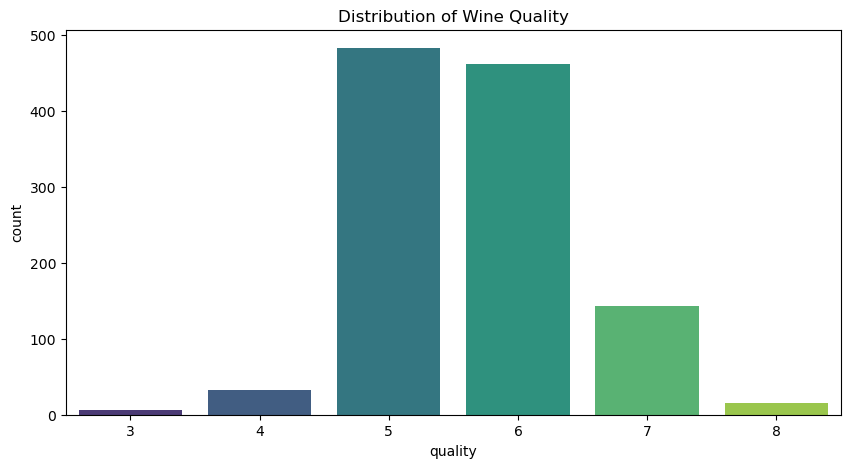

In [61]:
#Data Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Distribution of Wine Quality")
plt.show()

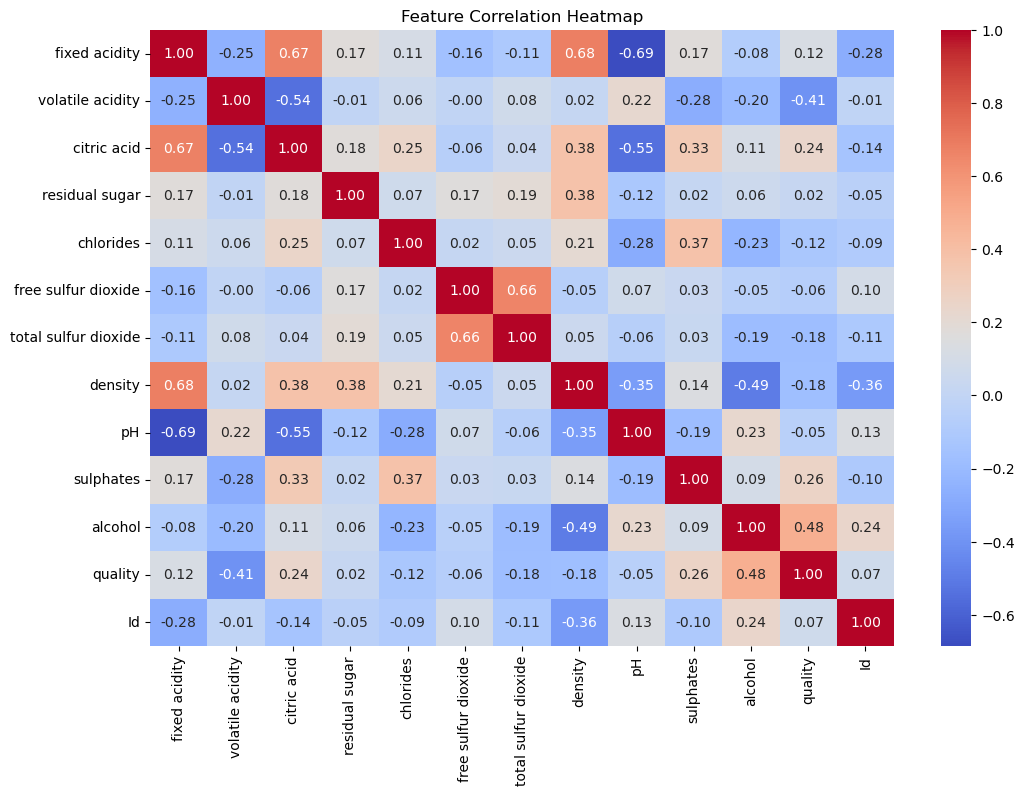

In [63]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [65]:
#dividing the data set into independent and target variable
X=df.drop('quality',axis=1)
y=df['quality']

In [67]:
#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
#dividing the dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
#Random Forest
rf = RandomForestClassifier(random_state=42)

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
rf_pred = rf.predict(X_test)

In [77]:
rf_pred

array([5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 7, 7, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6,
       5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 7, 5, 5, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 6, 7, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 7, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 6], dtype=int64)

In [79]:
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Accuracy: 0.6855895196506551
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.67      0.69      0.67       229



C:\Users\Masood\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Masood\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Masood\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
#SGD Classifier
sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

In [83]:
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [85]:
sgd_pred = sgd.predict(X_test)

In [87]:
sgd_pred

array([6, 5, 5, 5, 7, 7, 6, 5, 6, 5, 7, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7,
       5, 6, 6, 5, 7, 6, 5, 5, 7, 6, 7, 6, 5, 5, 6, 7, 6, 6, 6, 7, 6, 7,
       5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 6, 7, 5, 5, 7, 5, 7, 6, 6, 6, 6, 6,
       7, 5, 5, 7, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       6, 5, 7, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 5, 5,
       7, 6, 7, 5, 5, 6, 5, 6, 7, 6, 7, 5, 7, 5, 5, 6, 5, 5, 6, 6, 7, 6,
       6, 6, 6, 6, 7, 6, 7, 5, 6, 6, 6, 5, 7, 6, 6, 5, 7, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 7, 7, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7,
       6, 7, 5, 6, 5, 6, 6, 7, 5, 5, 6, 7, 5, 7, 5, 6, 6, 5, 7, 5, 7, 6,
       6, 6, 5, 6, 5, 7, 5, 7, 6], dtype=int64)

In [89]:
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))

Accuracy: 0.5589519650655022
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.59      0.64        96
           6       0.55      0.58      0.56        99
           7       0.31      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.31      0.34      0.32       229
weighted avg       0.57      0.56      0.56       229



C:\Users\Masood\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Masood\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Masood\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
#Compare Model Accuracies

In [93]:
model=['Random Forest','SGD']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, sgd_pred),
]

In [95]:
accuracies

[0.6855895196506551, 0.5589519650655022]